# **Logistics Regression**

In [1]:
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc,confusion_matrix,matthews_corrcoef
import itertools
import numpy as np

In [2]:
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart

no display found. Using non-interactive Agg backend


In [3]:
data = pd.read_csv('encoded_data.csv')
data.shape
#data.info()

(92359, 55)

In [4]:
X = data.drop('Score',axis=1)
y = data.Score.values

In [5]:
#splitting of the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
LogiReg = LogisticRegression(max_iter=100000,solver='lbfgs', penalty = 'l2')

param = {'C': [0.0001,0.001,0.01,0.1,1,10,20,30]}

LR = GridSearchCV(LogiReg,param,cv= None,refit=False,return_train_score=True,scoring='roc_auc')
LR.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [ ]:
LR.best_params_

{'C': 0.1}

In [19]:
clf = LogisticRegression(C= 0.1 ,max_iter=100000,solver='lbfgs', penalty = 'l2')
clf.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=100000)

In [20]:
print('intercept ', clf.intercept_[0])
pd.DataFrame({'coeff': clf.coef_[0]}, index=X.columns)

intercept  1.2174392223630321


,coeff
payment_value,-0.199095
order_item_id,0.011940
price,0.143969
freight_value,0.001282
product_name_lenght,-0.068618
product_description_lenght,0.024290
product_photos_qty,0.016325
product_weight_g,0.000007
delivery_days,-0.456670
estimated_days,-0.107808


In [21]:
print('AIC', AIC_score(y_test, clf.predict(X_test), df = len(X_train.columns) + 1))

AIC 25761.143203561383


In [22]:
matthews_corrcoef(y_test, clf.predict(X_test))

0.34872796392542843

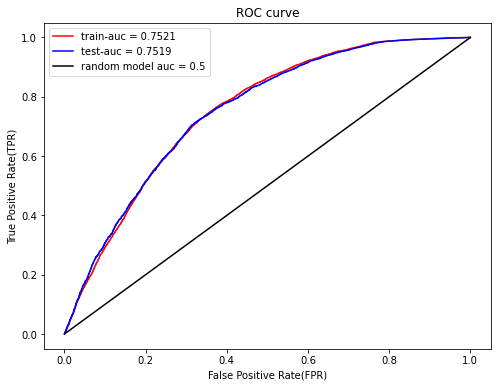

Best AUC for the model is 0.7519 


In [23]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train)
y_pred_test = clf.predict_proba(X_test)

#predicted values of Y labels
pred_label_train = clf.predict(X_train)
pred_label_test = clf.predict(X_test)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),4)
test_auc = round(auc(fpr_test,tpr_test),4)

%matplotlib inline
plt.figure(figsize=(8,6))
plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [24]:
LR_pred = clf.predict(X_test)
LR_proba = clf.predict_proba(X_test)
LR_result = pd.DataFrame({'actual': y_test, 
                             'p(0)': [p[0] for p in LR_proba],
                             'p(1)': [p[1] for p in LR_proba],
                             'predicted': LR_pred })
# display four different cases
cases = [i for i in range(20,30,1)]
print(LR_result.loc[cases])

    actual      p(0)      p(1)  predicted
20     1.0  0.195301  0.804699        1.0
21     1.0  0.097290  0.902710        1.0
22     1.0  0.241948  0.758052        1.0
23     0.0  0.065683  0.934317        1.0
24     1.0  0.049606  0.950394        1.0
25     1.0  0.084518  0.915482        1.0
26     1.0  0.068928  0.931072        1.0
27     1.0  0.114261  0.885739        1.0
28     0.0  0.825367  0.174633        0.0
29     1.0  0.064275  0.935725        1.0


**LiftChart and GainsChart**

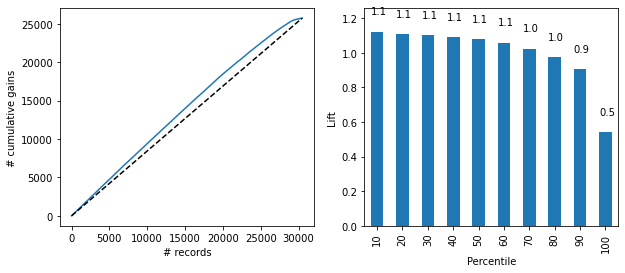

In [25]:
df = LR_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

**Confusion Matrix - Training Data**

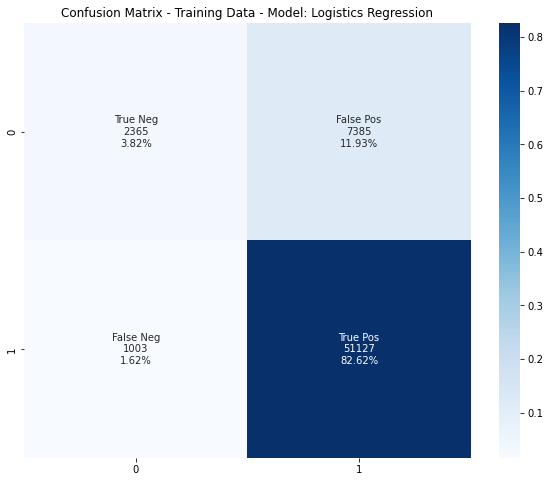

In [26]:
plt.figure(figsize=(10,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_train.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_train.flatten()/np.sum(cf_matrix_train)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot= labels ,fmt= '', cmap='Blues')
plt.title('Confusion Matrix - Training Data - Model: Logistics Regression')
plt.show()

**Confusion Matrix - Test Data**

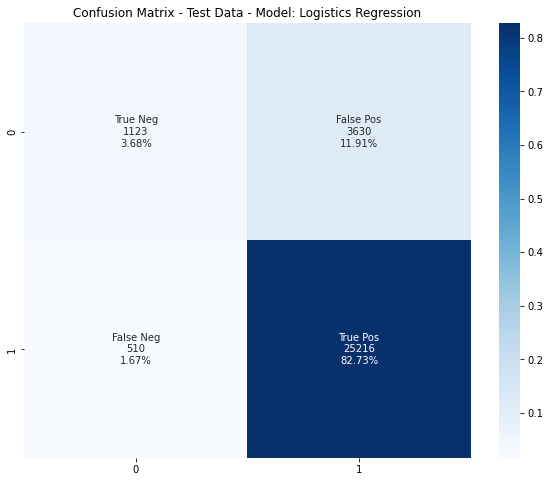

In [27]:
plt.figure(figsize=(10,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_test.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot= labels ,fmt= '', cmap='Blues')
plt.title('Confusion Matrix - Test Data - Model: Logistics Regression')
plt.show()

In [28]:
regressionSummary(y_train, clf.predict(X_train))


Regression statistics

               Mean Error (ME) : -0.1031
Root Mean Squared Error (RMSE) : 0.3682
     Mean Absolute Error (MAE) : 0.1356


In [29]:
print('F1 Score = ',round(f1_score(y_test, np.round(clf.predict(X_test),0), average='micro'),5))

F1 Score =  0.86417


In [30]:
matthews_corrcoef(y_test, np.round(clf.predict(X_test),0))

0.34872796392542843

In [18]:
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(np.round(clf.predict(X_test), color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.legend()
plt.show()

SyntaxError: invalid syntax (451039580.py, line 3)